In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
#prevents opening of new windows for plots in jupyter notebook
import seaborn as sns


# Steps Involved
1. importning libraries
2. loading data
3. reading data, dicribing, details
4. data cleaning
5. visualization
6. Analysis

In [4]:
df = pd.read_csv('SampleSuperstore.csv')
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


### Analysis Work

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.shape

(9994, 13)

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
df.sum()

Ship Mode       Second ClassSecond ClassSecond ClassStandard C...
Segment         ConsumerConsumerCorporateConsumerConsumerConsu...
Country         United StatesUnited StatesUnited StatesUnited ...
City            HendersonHendersonLos AngelesFort LauderdaleFo...
State           KentuckyKentuckyCaliforniaFloridaFloridaCalifo...
Postal Code                                             551572652
Region          SouthSouthWestSouthSouthWestWestWestWestWestWe...
Category        FurnitureFurnitureOffice SuppliesFurnitureOffi...
Sub-Category    BookcasesChairsLabelsTablesStorageFurnishingsA...
Sales                                                2297200.8603
Quantity                                                    37873
Discount                                                  1561.09
Profit                                                286397.0217
dtype: object

In [17]:
#sum of sales and profit:
print("The sum of sales is: {}".format(df['Sales'].sum()))
print(f"The sum of profit is {df['Profit'].sum()}")

The sum of sales is: 2297200.8603000003
The sum of profit is 286397.0217


### Visualization of data

<Axes: xlabel='Sales', ylabel='Profit'>

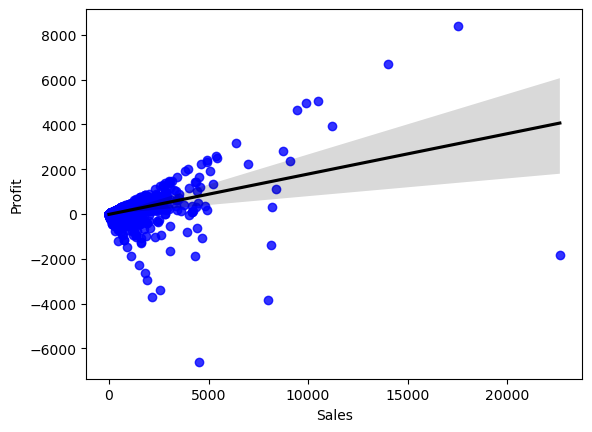

In [19]:
#scatter plot sales vs profit

sns.regplot(x='Sales', y='Profit', data=df, scatter_kws={"color" : "blue"}, line_kws={"color":"black"})

### Finding correlation between profit and sales

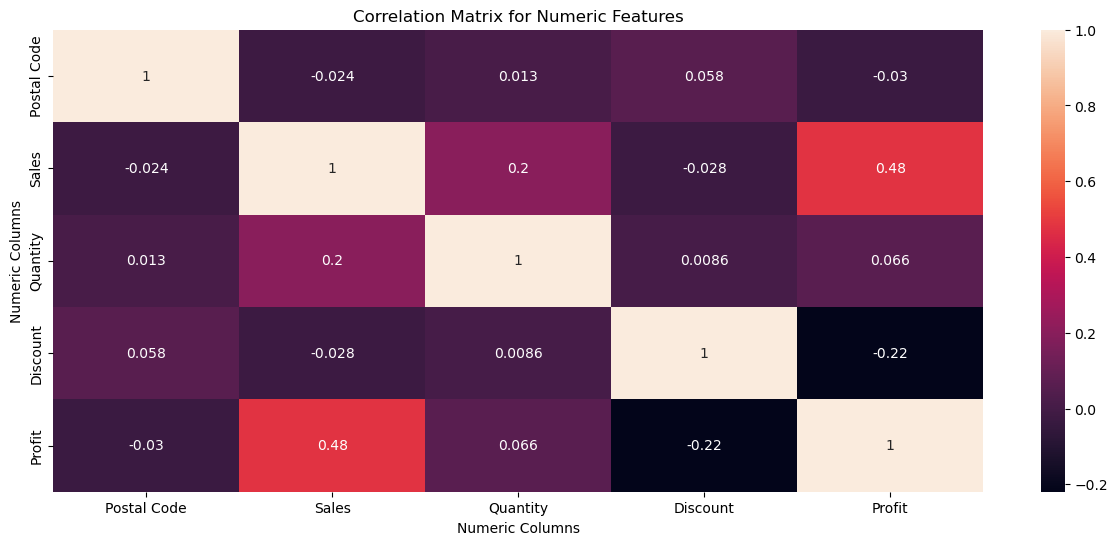

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Sales' and 'Profit' are numeric columns
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr(method='pearson')

plt.rcParams['figure.figsize'] = (15, 6)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Numeric Columns')
plt.ylabel('Numeric Columns')

plt.show()


if we analyze through correlation coeffecient , its 48% between sales and profit. consider as weak correlation, it means there are other factors also which is impacting profit.
We need to remove such columns.

In [26]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [27]:
#we will remove postal code
df = df.drop(['Postal Code'], axis=1)
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


A quick visual overview of the relationships between pairs of variables in the dataset. Each pair of variables is represented by a scatterplot, and the diagonal of the matrix shows histograms or kernel density plots for each individual variable:

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


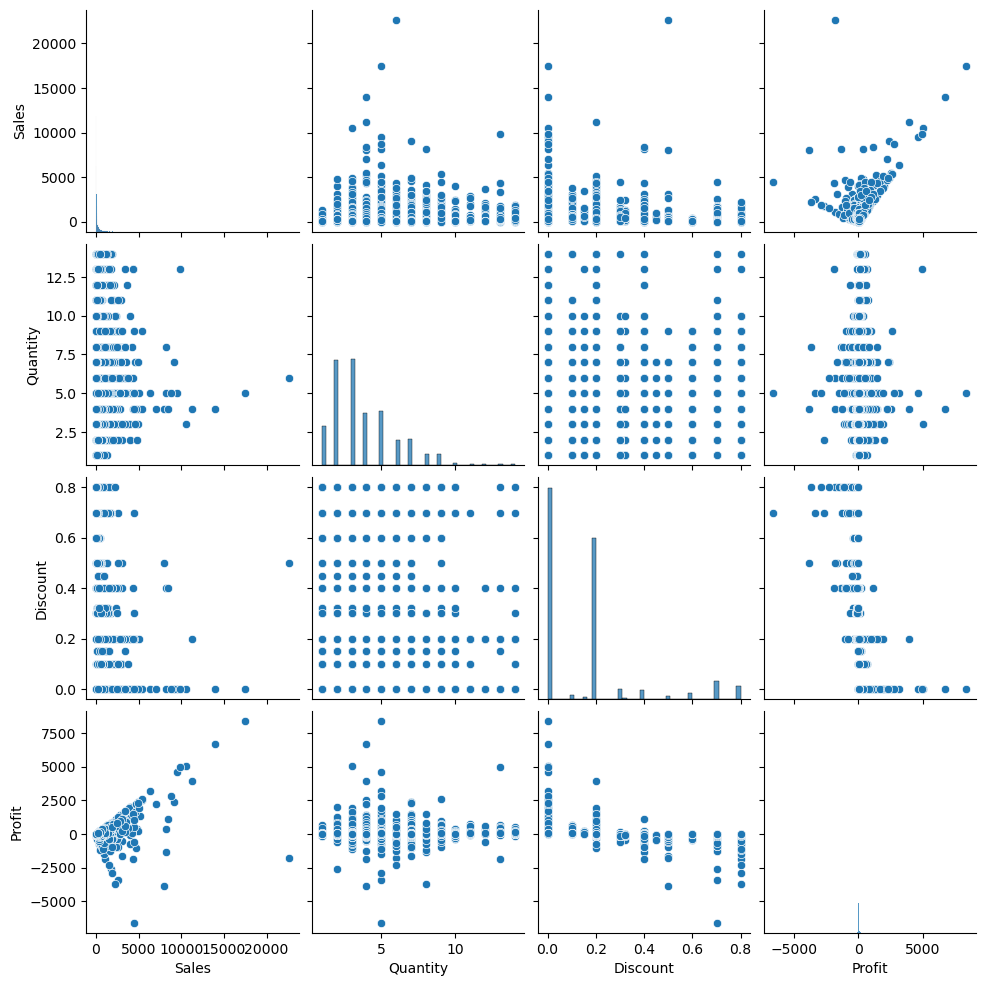

In [28]:
sns.pairplot(df)

Following is category wise sales and profit analysis of the store:

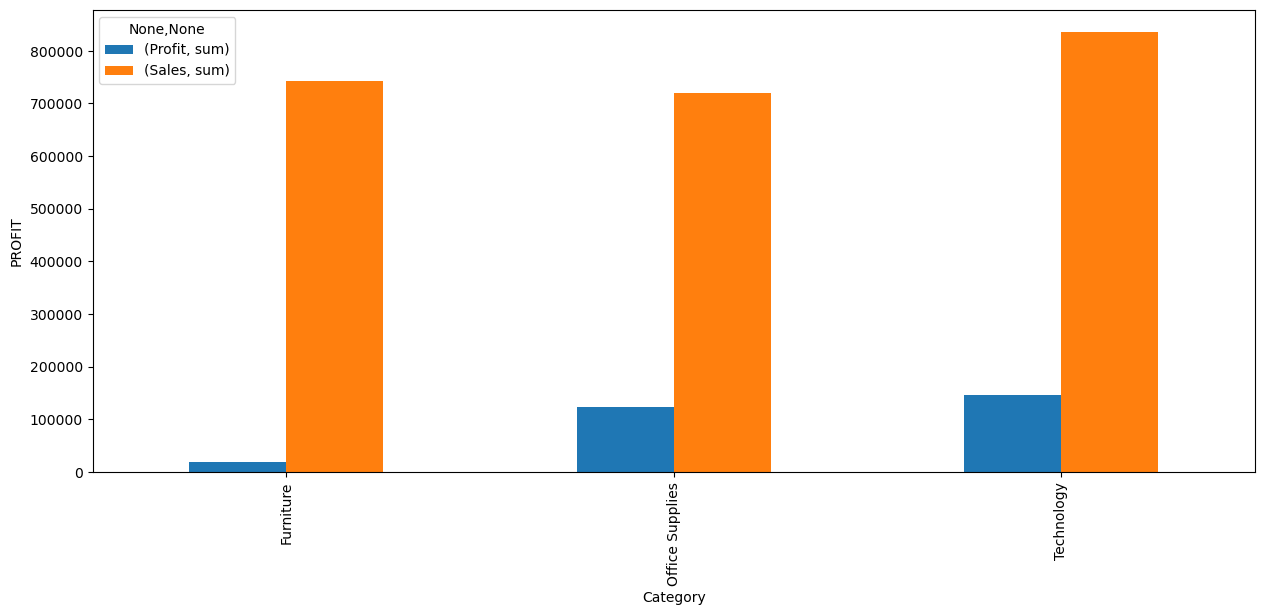

In [33]:
df.groupby('Category')[['Profit', 'Sales']].agg(['sum']).plot.bar()
plt.ylabel('PROFIT')
plt.show()

Analysis: We can see that the furniture sales are at par with the office supplies and technology, but the profit is relatively low.

We can further analyze which subcategories of the "Furniture" category are proving to be returning most loss:

<Axes: ylabel='Sub-Category'>

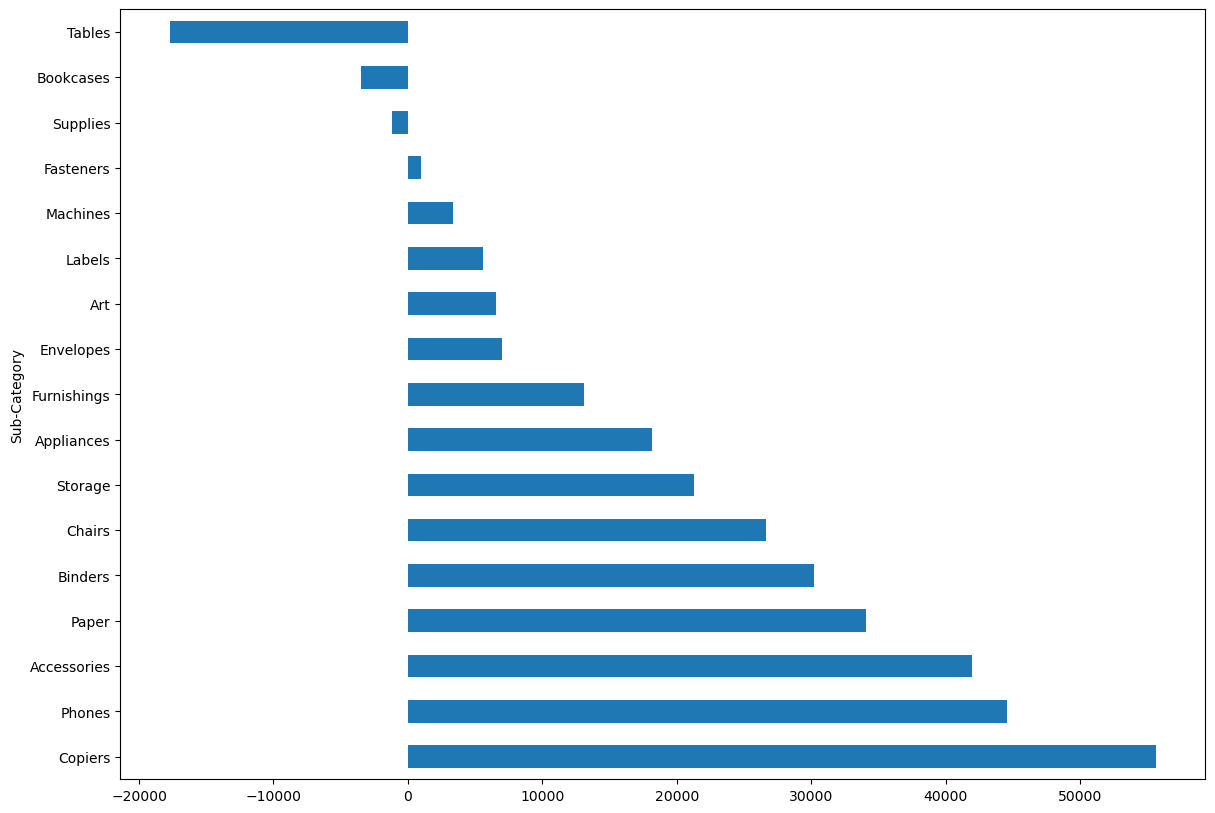

In [39]:
plt.figure(figsize=(14,10))
statewise = df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

Next we will analyze the proportions of customers region-wise

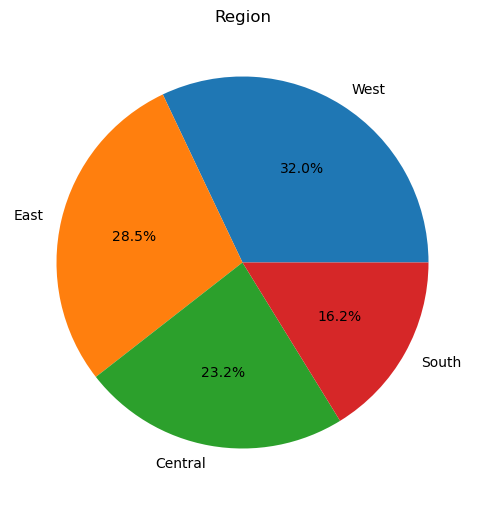

In [40]:
plt.figure(figsize = (6,8))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index, autopct='%1.1f%%')
plt.show()

Region-wise Profit Distribution:

In [42]:
df.groupby('Region').sum()['Sales']

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

Top State-based Sales and Profit:

C:\Users\Hp\AppData\Local\Temp\ipykernel_1724\3812236544.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


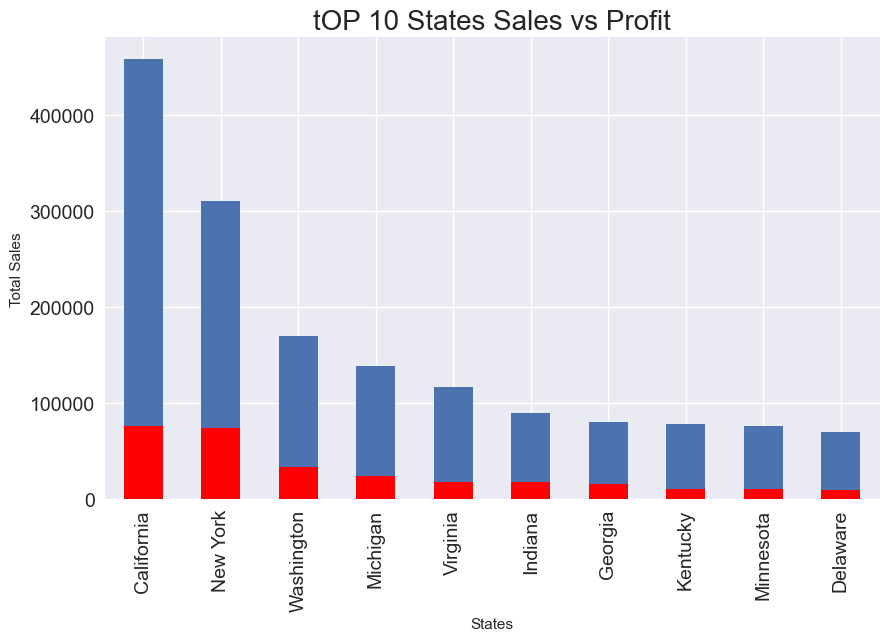

In [44]:
top_states_s = df.groupby("State").Sales.sum().nlargest(n=10)
top_states_p = df.groupby("State").Profit.sum().nlargest(n=10)

plt.style.use('seaborn')
top_states_s.plot(kind = 'bar', figsize = (10, 6), fontsize = 14)
top_states_p.plot(kind = 'bar', figsize = (10, 6), fontsize = 14, color = 'red')
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.title('tOP 10 States Sales vs Profit', fontsize = 20)
plt.show()

This graph draws the inference that the sales of the company is highly concentrated in the states of California and New York, while other states need to be worked on.

In [45]:
df.groupby('State').sum()['Sales'].reset_index()

,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180
5,Connecticut,13384.3570
6,Delaware,27451.0690
7,District of Columbia,2865.0200
8,Florida,89473.7080
9,Georgia,49095.8400


In [46]:
df.groupby('State').sum()['Profit'].reset_index()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579
5,Connecticut,3511.4918
6,Delaware,9977.3748
7,District of Columbia,1059.5893
8,Florida,-3399.3017
9,Georgia,16250.0433


### Conclusion and Inferences:
In our analysis, it is evident that certain areas are experiencing lower sales, indicating a need for a more in-depth exploration of those markets. To enhance overall profitability, it's essential to delve deeper into the factors affecting these regions and address any potential challenges.

While furniture items are performing well in terms of sales, the lack of profitability suggests a need to scrutinize additional parameters such as transportation costs, production expenses, or potential untapped markets that might contribute to lower revenues in certain regions.

In summary, the analysis suggests a dual approach—addressing challenges in areas with lower sales and profitability, while also fine-tuning strategies to capitalize on the success of high-profit commodities and major city markets. This balanced strategy will contribute to the overall growth and sustainability of the business.